# **Data Cleaning**

This dataset fuel type coloumn shows as 0/1 values by the fuel type. 1 denotes true and 0 for false.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plot

import warnings

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned Dataset.csv to Cleaned Dataset (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("Cleaned Dataset.csv")
df.head()

,Price,Brand,Model,Year,Transmission,Petrol,Hybrid,Diesel,Electric,CNG,Int - EngineCapacity,Int - Mileage
0,1300000,Maruti Suzuki,Alto,2005,Manual,0,0,0,0,1,1000,100000
1,1990000,Toyota,Corolla,2000,Manual,0,0,1,0,0,2000,135000
2,1185000,Toyota,Corolla,1991,Manual,0,0,1,0,0,2000,210130
3,1175000,Nissan,Sunny,1992,Manual,0,0,1,0,0,1700,118000
4,4250000,BMW,320d,2003,Tiptronic,0,0,1,0,0,2000,153000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 514 non-null    int64 
 1   Brand                 514 non-null    object
 2   Model                 514 non-null    object
 3   Year                  514 non-null    int64 
 4   Transmission          514 non-null    object
 5   Petrol                514 non-null    int64 
 6   Hybrid                514 non-null    int64 
 7   Diesel                514 non-null    int64 
 8   Electric              514 non-null    int64 
 9   CNG                   514 non-null    int64 
 10  Int - EngineCapacity  514 non-null    int64 
 11  Int - Mileage         514 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 48.3+ KB


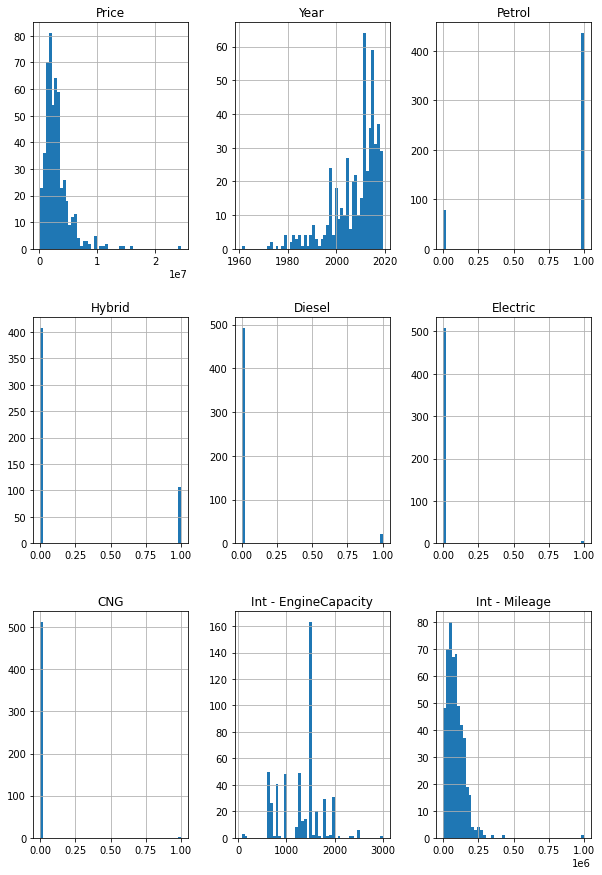

In [ ]:
df.hist(bins=50, figsize=(10,15))
plot.show()

Checking Correlations

In [ ]:
corr_matrix = df.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                   1.000000
Year                    0.450035
Int - EngineCapacity    0.330367
Hybrid                  0.218215
Electric                0.200236
Diesel                  0.020429
CNG                    -0.030640
Petrol                 -0.101074
Int - Mileage          -0.308115
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2042079c50>,
      dtype=object)

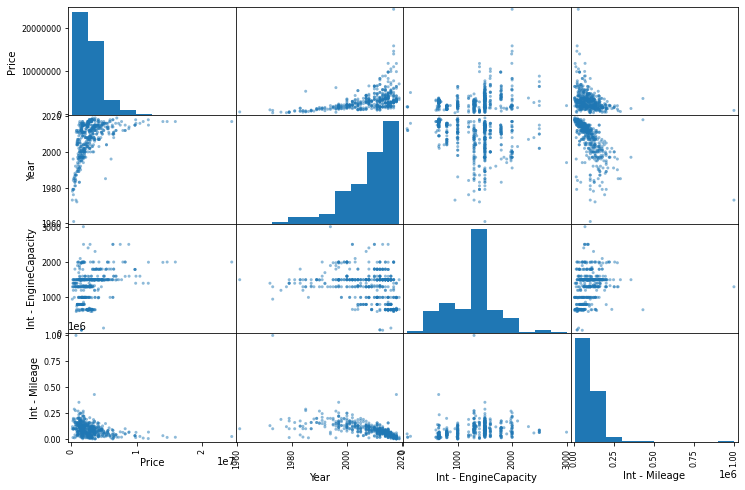

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Price","Year","Int - EngineCapacity","Int - Mileage"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [ ]:
df['Brand'].value_counts()

Toyota           155
Suzuki           107
Nissan            47
Honda             46
Mercedes Benz     20
Mazda             17
Mitsubishi        16
Perodua           14
Micro             13
Maruti Suzuki     12
BMW               10
Audi               8
Tata               8
Hyundai            7
Ford               7
Peugeot            4
Kia                3
Renault            3
Volkswagen         2
Datsun             2
Chevrolet          2
Rover              1
Daihatsu           1
Vauxhall           1
Daewoo             1
Chrysler           1
Subaru             1
Proton             1
Chery              1
Jaguar             1
Geely              1
Volvo              1
Name: Brand, dtype: int64

In [ ]:
df['Model'].value_counts()

Alto                39
Corolla             27
Wagon R Stingray    23
Fit                 22
Axio                21
                    ..
A-Star               1
QQ3                  1
405                  1
C350                 1
Zen                  1
Name: Model, Length: 113, dtype: int64

In [ ]:
df['Transmission'].value_counts()

Automatic    337
Manual       159
Tiptronic     18
Name: Transmission, dtype: int64

**There is a problem when one hot encoding the "Model" data because there is more than 100 models in the values therefore we have to drop the "Model" column**

In [ ]:
df = df.drop(['Model'], axis=1)
df.head()

,Price,Brand,Year,Transmission,Petrol,Hybrid,Diesel,Electric,CNG,Int - EngineCapacity,Int - Mileage
0,1300000,Maruti Suzuki,2005,Manual,0,0,0,0,1,1000,100000
1,1990000,Toyota,2000,Manual,0,0,1,0,0,2000,135000
2,1185000,Toyota,1991,Manual,0,0,1,0,0,2000,210130
3,1175000,Nissan,1992,Manual,0,0,1,0,0,1700,118000
4,4250000,BMW,2003,Tiptronic,0,0,1,0,0,2000,153000


In [ ]:
df.isnull().sum()

Price                   0
Brand                   0
Year                    0
Transmission            0
Petrol                  0
Hybrid                  0
Diesel                  0
Electric                0
CNG                     0
Int - EngineCapacity    0
Int - Mileage           0
dtype: int64

In [ ]:
df1 = pd.get_dummies(df['Brand'])
df1

,Audi,BMW,Chery,Chevrolet,Chrysler,Daewoo,Daihatsu,Datsun,Ford,Geely,Honda,Hyundai,Jaguar,Kia,Maruti Suzuki,Mazda,Mercedes Benz,Micro,Mitsubishi,Nissan,Perodua,Peugeot,Proton,Renault,Rover,Subaru,Suzuki,Tata,Toyota,Vauxhall,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Audi           514 non-null    uint8
 1   BMW            514 non-null    uint8
 2   Chery          514 non-null    uint8
 3   Chevrolet      514 non-null    uint8
 4   Chrysler       514 non-null    uint8
 5   Daewoo         514 non-null    uint8
 6   Daihatsu       514 non-null    uint8
 7   Datsun         514 non-null    uint8
 8   Ford           514 non-null    uint8
 9   Geely          514 non-null    uint8
 10  Honda          514 non-null    uint8
 11  Hyundai        514 non-null    uint8
 12  Jaguar         514 non-null    uint8
 13  Kia            514 non-null    uint8
 14  Maruti Suzuki  514 non-null    uint8
 15  Mazda          514 non-null    uint8
 16  Mercedes Benz  514 non-null    uint8
 17  Micro          514 non-null    uint8
 18  Mitsubishi     514 non-null    uint8
 19  Nissan  

In [ ]:
df = pd.concat([df,df1],axis =1)

In [ ]:
df = df.drop('Brand',axis = 1)

In [ ]:
df2 = pd.get_dummies(df['Transmission'])
df2

,Automatic,Manual,Tiptronic
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
509,1,0,0
510,1,0,0
511,1,0,0
512,1,0,0


In [ ]:
df = pd.concat([df,df2],axis =1)

In [ ]:
df = df.drop('Transmission',axis = 1)

In [ ]:
X = df[['Year',	'Petrol',	'Hybrid',	'Diesel',	'Electric',	'CNG',	'Int - EngineCapacity',	'Int - Mileage',	'Audi',	'BMW',	'Chery',	'Chevrolet',	'Chrysler',	'Daewoo',	'Daihatsu',	'Datsun',	'Ford',	'Geely',	'Honda',	'Hyundai',	'Jaguar',	'Kia',	'Maruti Suzuki',	'Mazda',	'Mercedes Benz',	'Micro',	'Mitsubishi',	'Nissan',	'Perodua',	'Peugeot',	'Proton',	'Renault',	'Rover',	'Subaru',	'Suzuki',	'Tata',	'Toyota',	'Vauxhall',	'Volkswagen',	'Volvo',	'Automatic',	'Manual',	'Tiptronic']]
y = df['Price']

# **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [ ]:
score

0.7655305246242349

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
506,2775000,2837500.0
286,6500000,7475000.0
439,4540000,3075600.0
319,1745000,1731500.0
174,1760000,1785500.0
...,...,...
171,7700000,6922500.0
142,3590000,3511500.0
9,1975000,1752000.0
463,14650000,10947500.0


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [ ]:
score

0.5866572890472008

# **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
506,2775000,2800000.0
286,6500000,6500000.0
439,4540000,2790000.0
319,1745000,1755000.0
174,1760000,2250000.0
...,...,...
171,7700000,7250000.0
142,3590000,3590000.0
9,1975000,1860000.0
463,14650000,15900000.0


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [ ]:
score

0.6528907924155343